<a href="https://colab.research.google.com/github/aditya2k5/Forecasting-electric-load-using-linear-regression_ML/blob/main/forecasting_electric_load_using_linear_regression_ml_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all needed libraries in python

In [16]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

Load dataset

In [5]:
df = pd.read_csv('synthetic_energy_data.csv')


In [7]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

Define features and target variable

In [8]:
features = ['Current (A)', 'Voltage (V)', 'Temperature (°C)', 'Previous Load (kW)', 'Altitude (m)']
target = 'Electric Load (kW)'


Split data into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

Scale features (important for gradient boosting models)



In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Initialize and train XGBoost model

In [11]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Predict on test set

In [12]:
y_pred = model.predict(X_test)


Evaluate performance

In [13]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f} kW')

Mean Absolute Error: 2.43 kW


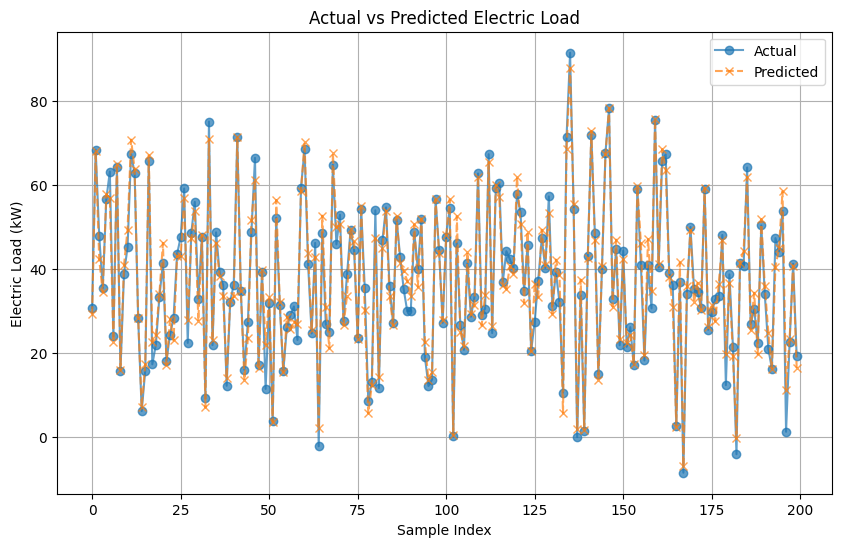

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_pred, label='Predicted', marker='x', linestyle='--', alpha=0.7)
plt.title('Actual vs Predicted Electric Load')
plt.xlabel('Sample Index')
plt.ylabel('Electric Load (kW)')
plt.legend()
plt.grid(True)
plt.show()